In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

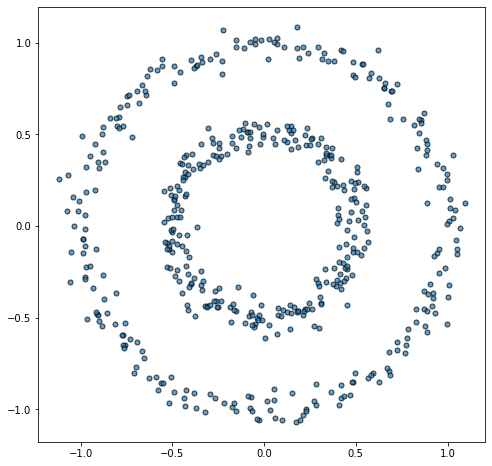

In [4]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            #c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

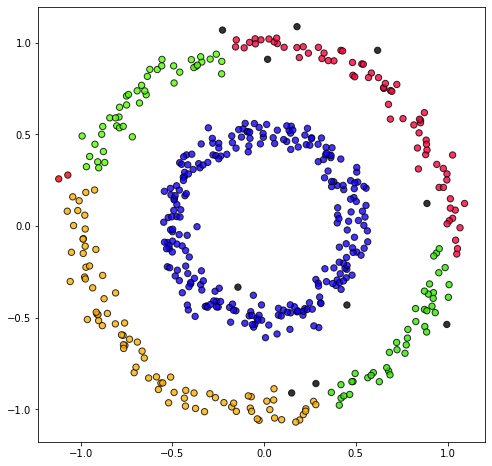

In [5]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [6]:
pogo.initial_idx_

2389

In [7]:
pogo.idx_

1628

In [8]:
pogo.candidates_[:20]

[2389,
 1996,
 1717,
 1824,
 1933,
 2320,
 1592,
 1628,
 1685,
 1542,
 2271,
 1663,
 1908,
 1572,
 1888,
 2251,
 1531,
 1873,
 1623,
 2246]

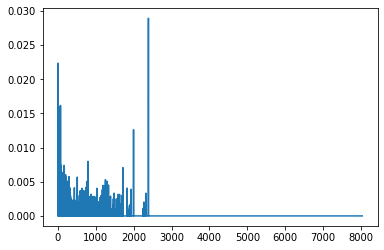

In [9]:
plt.plot(pogo.gap_vector_)

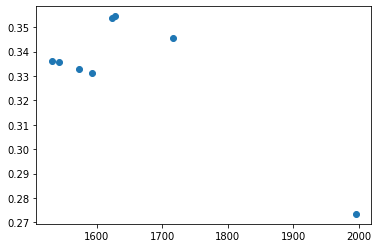

In [10]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

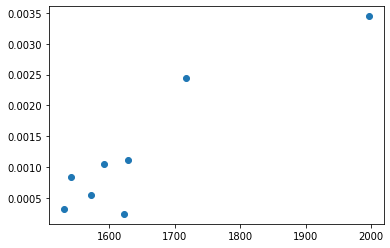

In [11]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

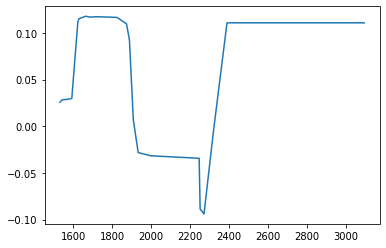

In [12]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


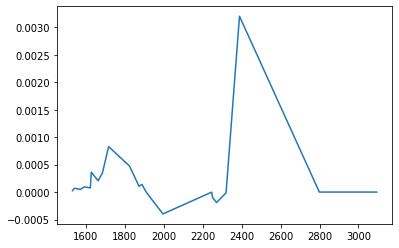

In [13]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [14]:
silhouette_indices[np.argmax(silhouette_gap)]

2389

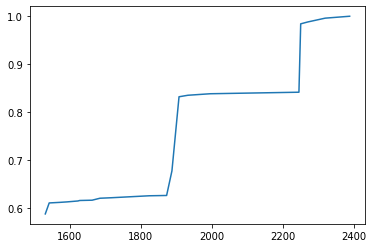

In [15]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [16]:
rand_indices[np.argmax(rand_array)]

2389

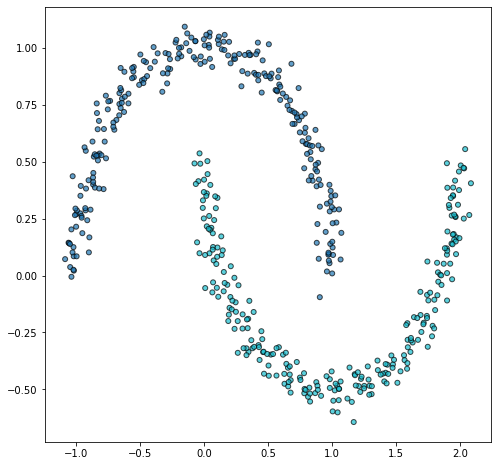

In [17]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

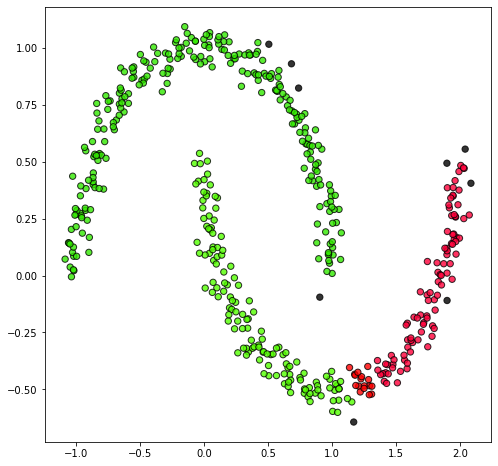

In [18]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [19]:
pogo.initial_idx_

2621

In [20]:
pogo.idx_

1628

In [21]:
pogo.candidates_[:10]

[2621, 3659, 2107, 1734, 1940, 1510, 2514, 1862, 1628, 1594]

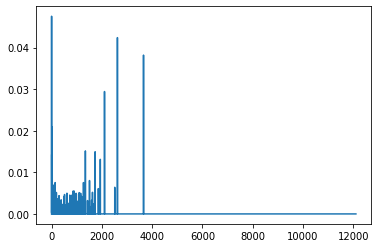

In [22]:
plt.plot(pogo.gap_vector_)

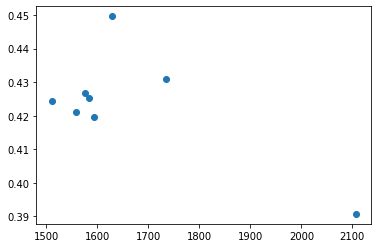

In [23]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [24]:
pogo.silh_idx_[np.argmax(pogo.silh_list_)]

1628

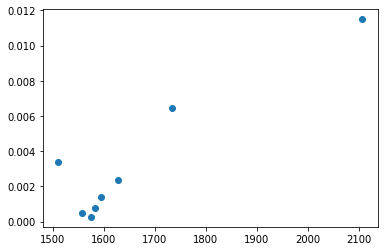

In [25]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [26]:
pogo.silh_idx_[np.argmax(pogo.score_list_)]

2107

In [27]:
#silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)

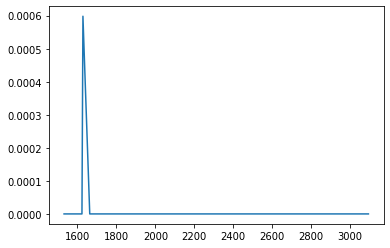

In [28]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [29]:
silhouette_indices[np.argmax(silhouette_gap)]

1628

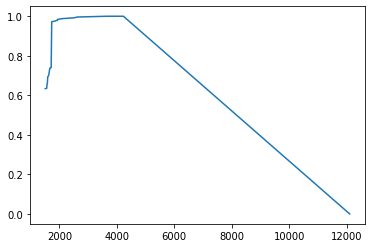

In [30]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [31]:
rand_indices[np.argmax(rand_array)]

3659

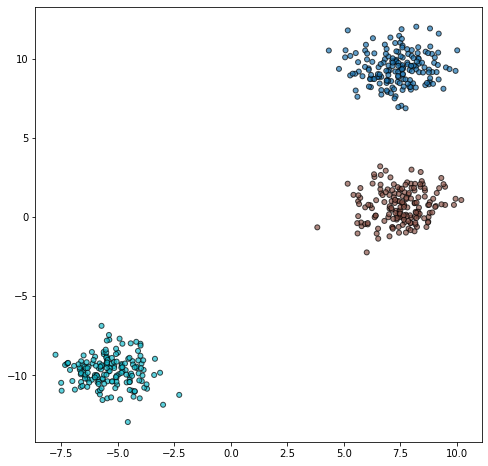

In [32]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

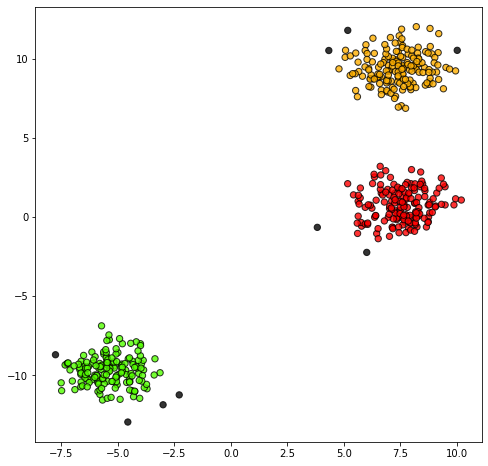

In [33]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [34]:
pogo.initial_idx_

22008

In [35]:
pogo.idx_

4257

In [36]:
pogo.candidates_[:20]

[22008,
 12286,
 16771,
 40162,
 5322,
 8881,
 6624,
 10585,
 4257,
 7996,
 3177,
 2924,
 2656,
 5107,
 4003,
 1805,
 3739,
 2105,
 2470,
 2355]

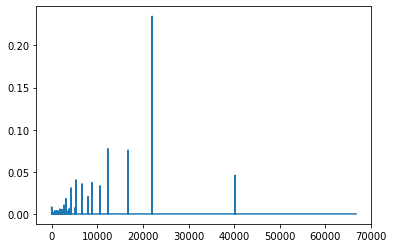

In [37]:
plt.plot(pogo.gap_vector_)

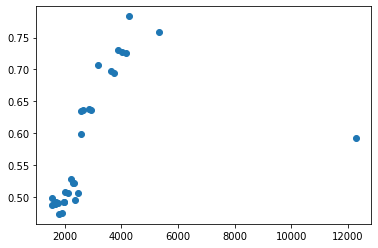

In [38]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [39]:
pogo.silh_idx_[np.argmax(pogo.silh_list_)]

4257

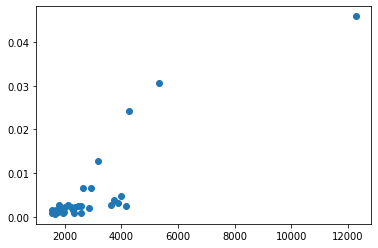

In [40]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [41]:
pogo.silh_idx_[np.argmax(pogo.score_list_)]

12286

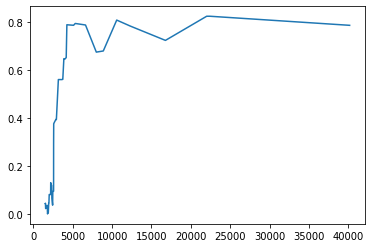

In [42]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

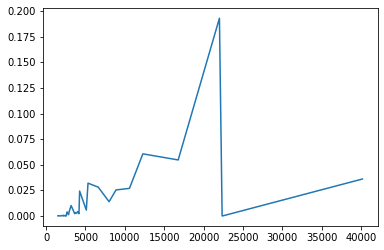

In [43]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [44]:
silhouette_indices[np.argmax(silhouette_gap)]

22008

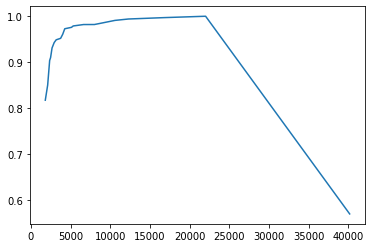

In [45]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [46]:
rand_indices[np.argmax(rand_array)]

22008

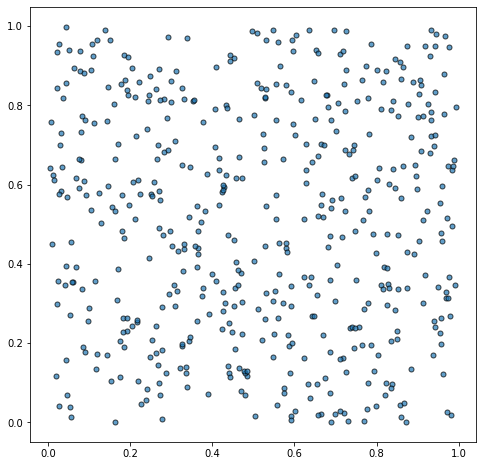

In [47]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

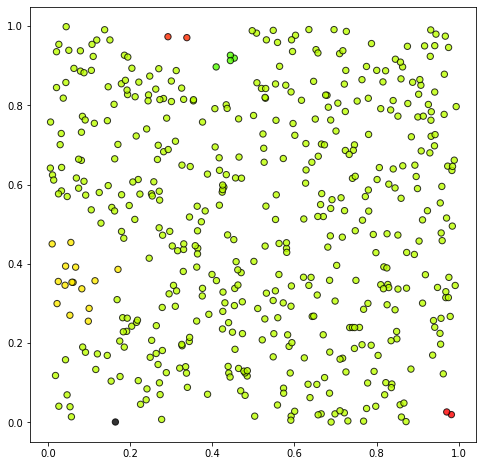

In [48]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [49]:
pogo.initial_idx_

1636

In [50]:
pogo.idx_

1516

In [51]:
pogo.candidates_[:20]

[1636,
 1516,
 2091,
 2411,
 2523,
 3329,
 1559,
 1558,
 1557,
 1556,
 1555,
 1554,
 1553,
 1552,
 1551,
 1550,
 1549,
 1548,
 1547,
 1546]

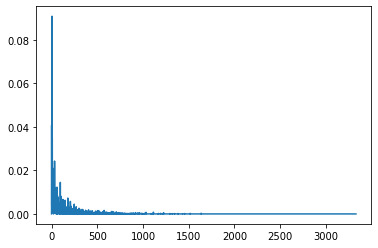

In [52]:
plt.plot(pogo.gap_vector_)

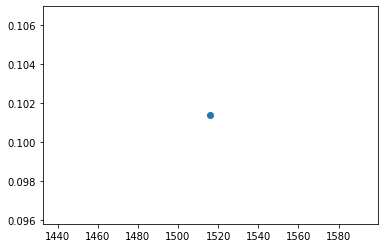

In [53]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [54]:
#pogo.silh_idx_[np.argmax(pogo.silh_list_)]

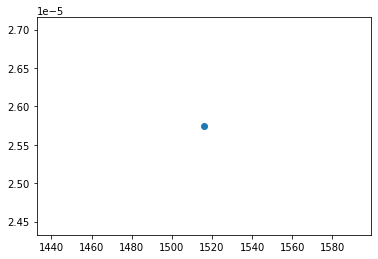

In [55]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [56]:
#pogo.silh_idx_[np.argmax(pogo.score_list_)]

In [57]:
#silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


In [58]:
#silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
#plt.plot(silhouette_indices,silhouette_gap)

In [59]:
#silhouette_indices[np.argmax(silhouette_gap)]

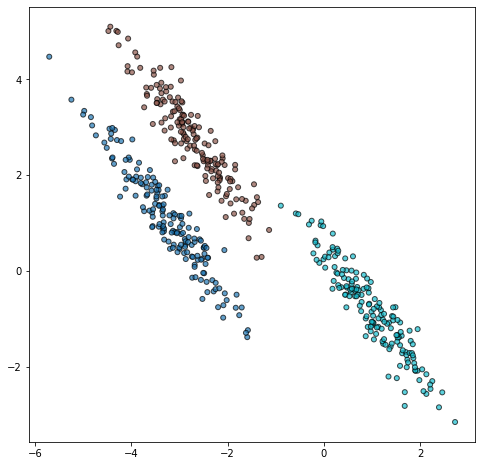

In [60]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

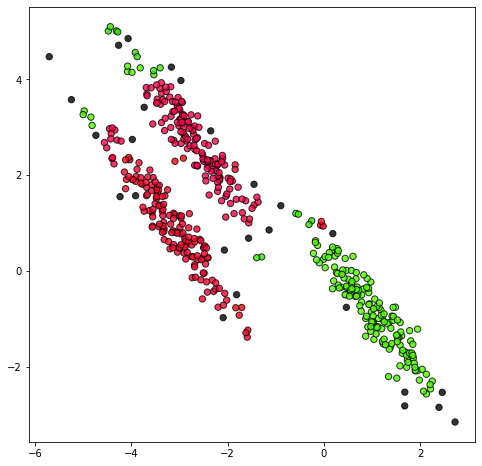

In [61]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [62]:
pogo.initial_idx_

1590

In [63]:
pogo.idx_

1510

In [64]:
pogo.candidates_[:20]

[1590,
 4803,
 3035,
 2643,
 1877,
 2482,
 4003,
 3436,
 2133,
 1510,
 3770,
 2329,
 4498,
 7101,
 2843,
 2249,
 8321,
 2006,
 3658,
 6584]

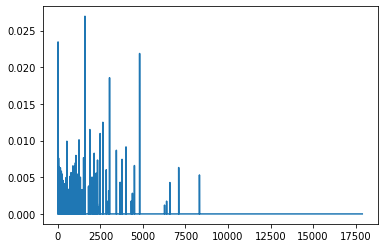

In [65]:
plt.plot(pogo.gap_vector_)

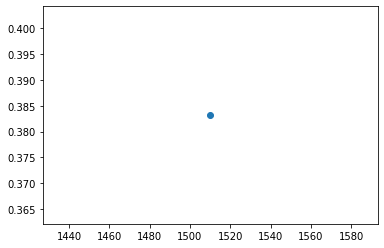

In [66]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [67]:
pogo.silh_idx_[np.argmax(pogo.silh_list_)]

1510

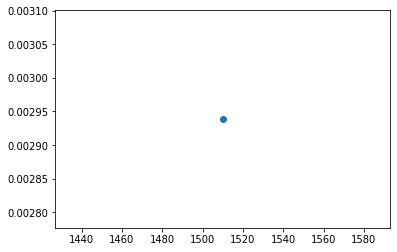

In [68]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [69]:
pogo.silh_idx_[np.argmax(pogo.score_list_)]

1510

In [70]:
#silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [71]:
#silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
#plt.plot(silhouette_indices,silhouette_gap)

In [72]:
silhouette_indices[np.argmax(silhouette_gap)]

22008

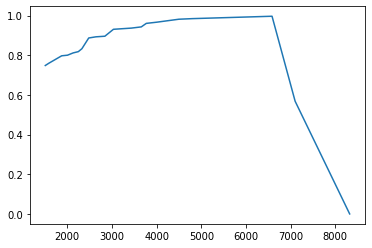

In [73]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [74]:
rand_indices[np.argmax(rand_array)]

6584

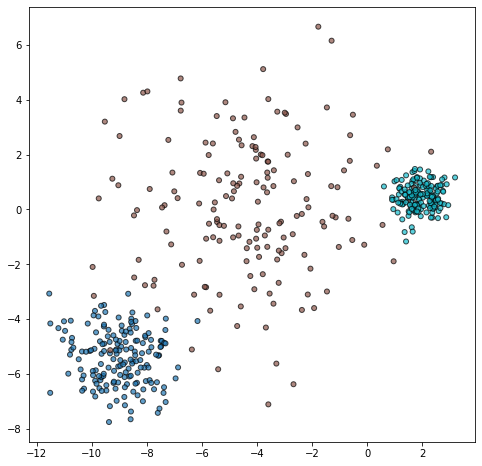

In [75]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

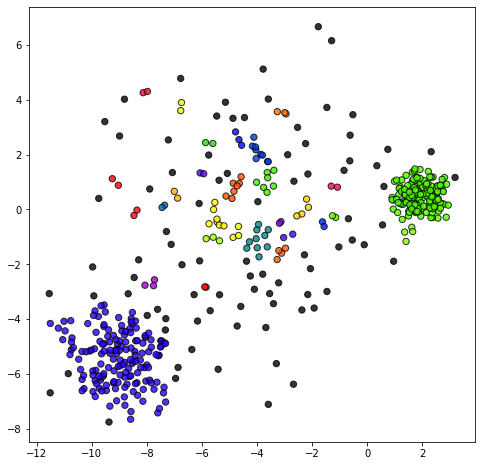

In [76]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [77]:
pogo.initial_idx_

4283

In [78]:
pogo.idx_

2383

In [79]:
pogo.candidates_[:20]

[4283,
 3849,
 2662,
 5883,
 5369,
 2443,
 12260,
 2544,
 2213,
 3485,
 6221,
 4560,
 6926,
 1729,
 8546,
 3274,
 3063,
 2982,
 3635,
 1921]

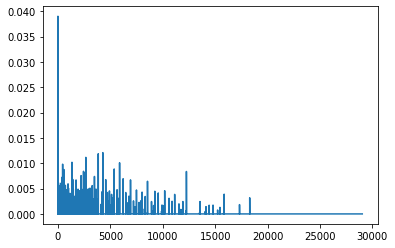

In [80]:
plt.plot(pogo.gap_vector_)

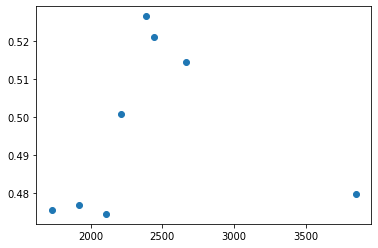

In [81]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [82]:
pogo.silh_idx_[np.argmax(pogo.silh_list_)]

2383

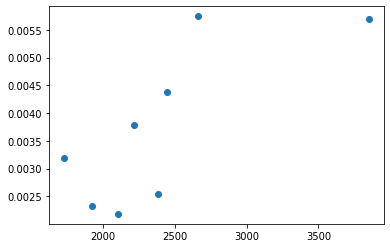

In [83]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [84]:
pogo.silh_idx_[np.argmax(pogo.score_list_)]

2662

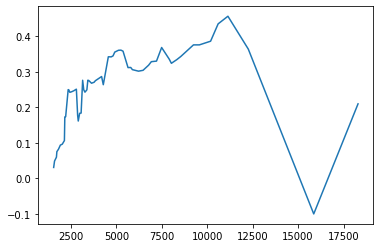

In [85]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


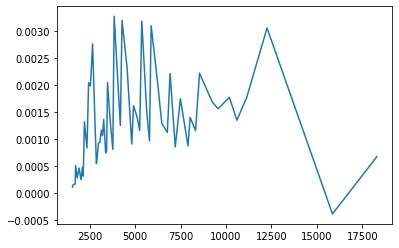

In [86]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [87]:
silhouette_indices[np.argmax(silhouette_gap)]

3849

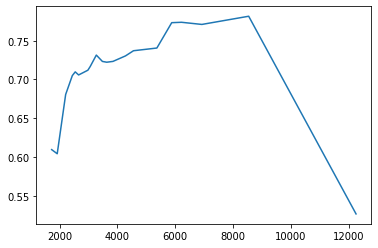

In [88]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [89]:
rand_indices[np.argmax(rand_array)]

8546

In [90]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

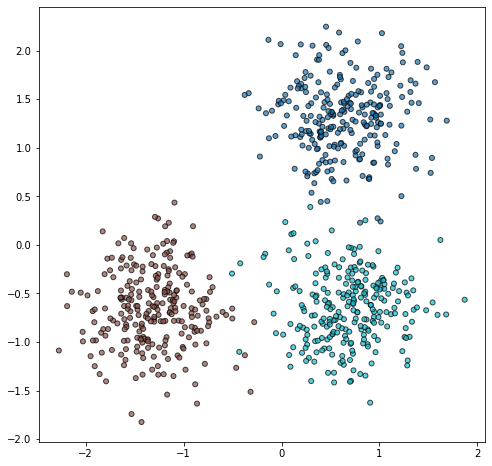

In [91]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

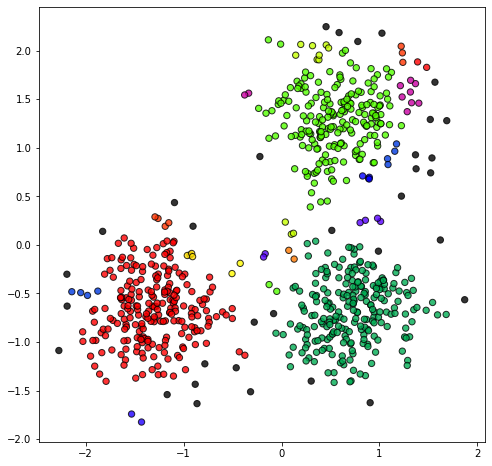

In [92]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [93]:
pogo.initial_idx_

3904

In [94]:
pogo.idx_

3171

In [95]:
pogo.candidates_[:20]

[3904,
 4182,
 4817,
 5875,
 2569,
 3004,
 2659,
 7424,
 3227,
 3402,
 2429,
 5532,
 5290,
 2494,
 3319,
 4609,
 3171,
 3616,
 2766,
 3490]

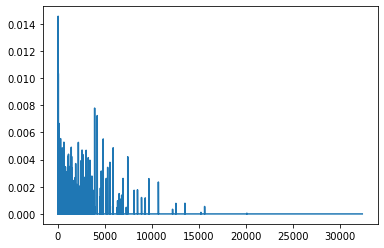

In [96]:
plt.plot(pogo.gap_vector_)

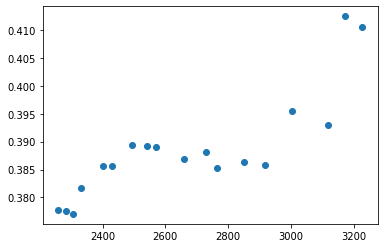

In [97]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [98]:
pogo.silh_idx_[np.argmax(pogo.silh_list_)]

3171

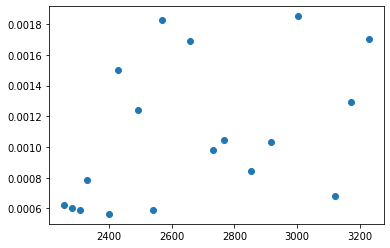

In [99]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [100]:
pogo.silh_idx_[np.argmax(pogo.score_list_)]

3004

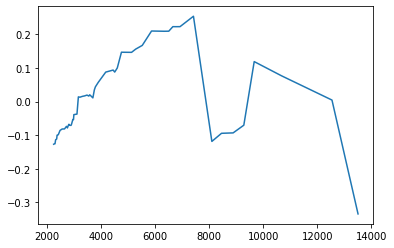

In [101]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [102]:
silhouette_indices[np.argmax(silhouette_array)]

7424

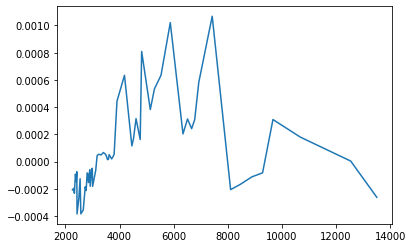

In [103]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [104]:
silhouette_indices[np.argmax(silhouette_gap)]

7424

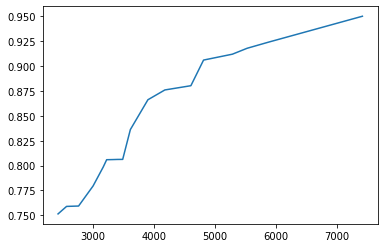

In [105]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [106]:
rand_indices[np.argmax(rand_array)]

7424

In [107]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [108]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [109]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)


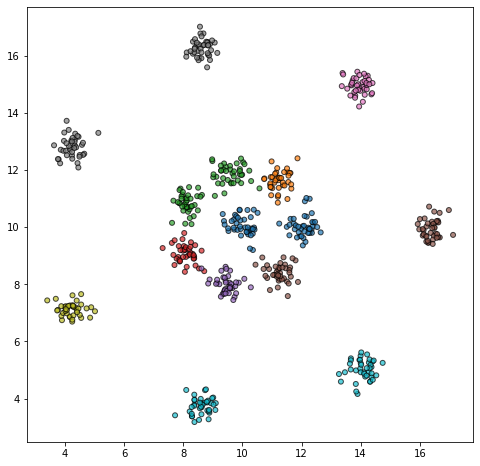

In [110]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

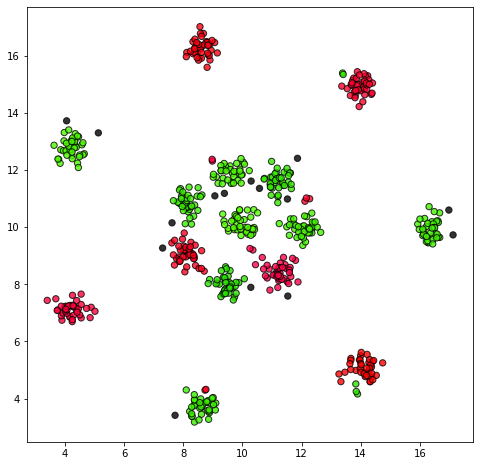

In [111]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [112]:
pogo.initial_idx_

7643

In [113]:
pogo.idx_

2781

In [114]:
pogo.candidates_[:20]

[7643,
 6053,
 3807,
 4346,
 5481,
 7259,
 3187,
 6889,
 5236,
 4962,
 1903,
 5887,
 2781,
 3481,
 3613,
 2606,
 2452,
 4837,
 2933,
 2380]

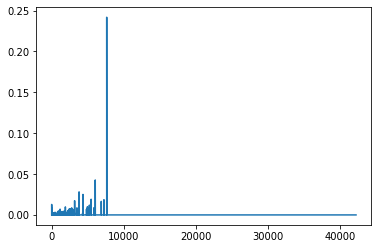

In [115]:
plt.plot(pogo.gap_vector_)

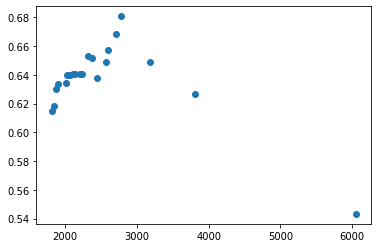

In [116]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [117]:
pogo.silh_idx_[np.argmax(pogo.silh_list_)]

2781

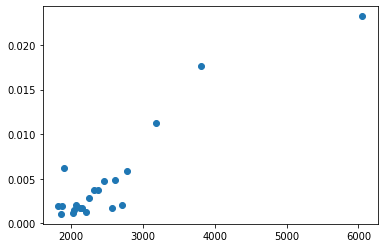

In [118]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [119]:
pogo.silh_idx_[np.argmax(pogo.score_list_)]

6053

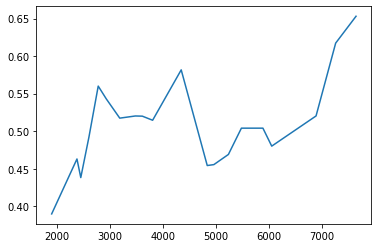

In [120]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


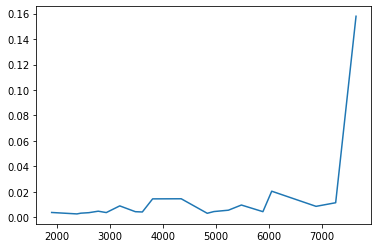

In [121]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [122]:
silhouette_indices[np.argmax(silhouette_gap)]

7643

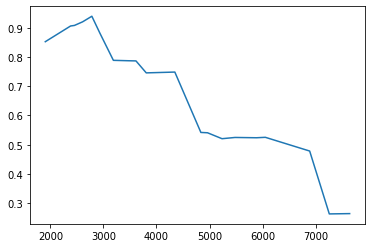

In [123]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [124]:
rand_indices[np.argmax(rand_array)]

2781

In [125]:
X, y, filename = return_dataset('D31.txt')

https://cs.joensuu.fi/sipu/datasets/D31.txt
D31.txt
(3100, 3)
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 [25.2285  4.7447  1.    ]
 [25.7529  5.1564  1.    ]
 [24.0785  5.6693  1.    ]
 [25.2722  6.8676  1.    ]
 [24.6535  6.2443  1.    ]
 [26.9834  6.633   1.    ]
 [25.7437  6.3179  1.    ]]
(3100,)
(3100, 2)


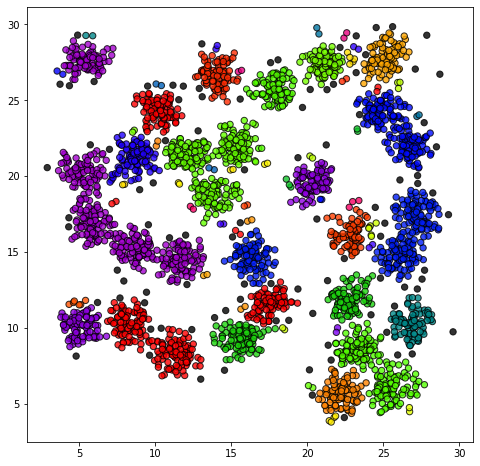

In [126]:
pogo = Pogo()
pogo.fit(X)
pogo.plot()

In [127]:
pogo.initial_idx_

46769

In [128]:
pogo.idx_

14232

In [129]:
pogo.candidates_[:40]

[46769,
 75731,
 36168,
 59567,
 28899,
 30916,
 33661,
 69625,
 25467,
 23697,
 17677,
 65829,
 26203,
 20330,
 43716,
 27529,
 40056,
 39089,
 28311,
 32150,
 45146,
 42705,
 21389,
 57702,
 22729,
 20873,
 21739,
 14232,
 11073,
 27133,
 24512,
 24869,
 15717,
 13297,
 56355,
 18771,
 13456,
 15217,
 22221,
 54724]

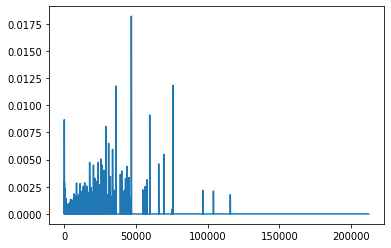

In [130]:
plt.plot(pogo.gap_vector_)

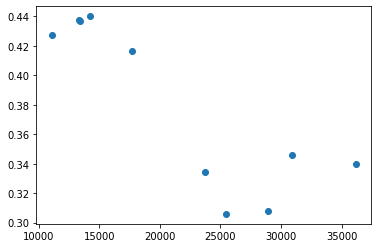

In [131]:
plt.plot(pogo.silh_idx_,pogo.silh_list_,'o')

In [132]:
pogo.silh_idx_[np.argmax(pogo.silh_list_)]

14232

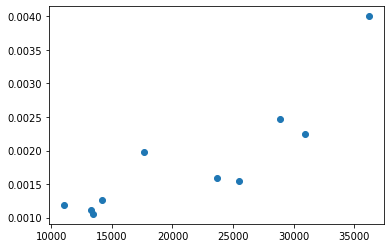

In [133]:
plt.plot(pogo.silh_idx_,pogo.score_list_,'o')

In [134]:
pogo.silh_idx_[np.argmax(pogo.score_list_)]

36168

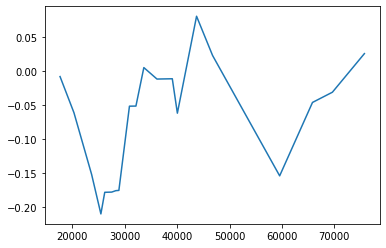

In [135]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


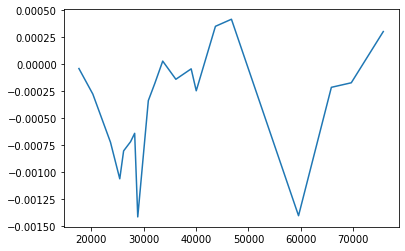

In [136]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

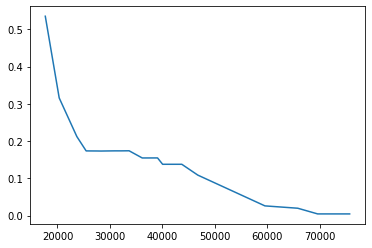

In [140]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [138]:
rand_indices[np.argmax(rand_array)]

17677